# Autoencoder:
  It is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. 

Import TensorFlow and other libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Model


Load Dataset


In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Define Encoder & Decoder

In [4]:
class Autoencoder(Model):
    def __init__(self, shape, latent_dim=64):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = keras.Sequential([
            keras.layers.Flatten(),
            keras.layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = keras.Sequential([
            keras.layers.Dense(np.prod(shape), activation='sigmoid'),
            keras.layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(shape, latent_dim)
        


In [5]:

autoencoder.compile(optimizer='adam', loss=keras.losses.MeanSquaredError())

 Train Model

In [6]:
# Train the model using x_train as both the input and the target. The encoder will learn to compress the dataset from 784 dimensions to the latent space, and the decoder will learn to reconstruct the original images.
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0393 - val_loss: 0.0133
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0123 - val_loss: 0.0107
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0087 - val_loss: 0.0090
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0087 - val_loss: 0.0088


Encode & Decode Image

In [7]:
encode_images = autoencoder.encoder(x_test).numpy()
print(encode_images.shape)
decoded_images = autoencoder.decoder(encode_images).numpy()


(10000, 64)


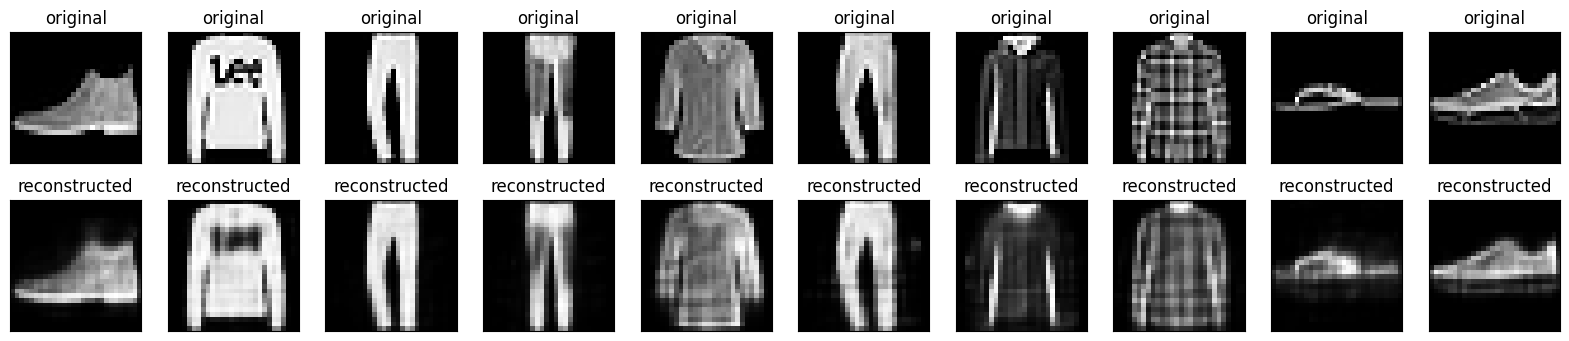

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_images[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
# Evaluate the autoencoder using thresholded (binarized) images
x_test_bin = (x_test > 0.5).astype(int)
decoded_bin = (decoded_images > 0.5).astype(int)

print("Accuracy:", accuracy_score(x_test_bin.flatten(), decoded_bin.flatten()))
print("Precision:", precision_score(x_test_bin.flatten(), decoded_bin.flatten(), average='macro', zero_division=0))
print("Recall:", recall_score(x_test_bin.flatten(), decoded_bin.flatten(), average='macro', zero_division=0))

Accuracy: 0.9516442602040817
Precision: 0.948115541830834
Recall: 0.93915120005614
